* In this project, you will visualize and make calculations from medical examination data using matplotlib, seaborn, and pandas. The dataset values were collected during medical examinations.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('medical_examination.csv')

df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
df['overweight'] = (df['weight'] / (df['height']/100)**2)

df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177


In [4]:
df['overweight'].value_counts()

23.875115    943
23.437500    651
24.221453    489
25.711662    363
22.038567    358
            ... 
45.884261      1
35.430432      1
38.622363      1
44.800000      1
17.345169      1
Name: overweight, Length: 3808, dtype: int64

In [5]:
df['overweight'] = df['overweight'].apply(lambda x: 1 if x>25 else 0)

df['overweight'].value_counts()

1    43546
0    26454
Name: overweight, dtype: int64

In [6]:
df['gluc'].value_counts()

1    59479
3     5331
2     5190
Name: gluc, dtype: int64

In [7]:
df['gluc'] = df['gluc'].apply(lambda x: 0 if x==1 else 1)

df['gluc'].value_counts()

0    59479
1    10521
Name: gluc, dtype: int64

In [8]:
df['cholesterol'].value_counts()

1    52385
2     9549
3     8066
Name: cholesterol, dtype: int64

In [9]:
df['cholesterol'] = df['cholesterol'].apply(lambda x: 0 if x==1 else 1)

df['cholesterol'].value_counts()

0    52385
1    17615
Name: cholesterol, dtype: int64

In [10]:
df_melt = df.melt(id_vars='cardio',
                 value_vars=['active', 'alco', 'cholesterol', 'gluc','overweight', 'smoke'])

df_melt

,cardio,variable,value
0,0,active,1
1,1,active,1
2,1,active,0
3,1,active,1
4,0,active,0
...,...,...,...
419995,0,smoke,1
419996,1,smoke,0
419997,1,smoke,0
419998,1,smoke,0


In [16]:
# grouping and reformating the data to split it by 'cardio':

df_cat = pd.DataFrame(df_melt.groupby(['cardio', 'variable', 
                                       'value'])['value'].count()).rename(columns={
    'value': 'total'
}).reset_index()

df_cat

,cardio,variable,value,total
0,0,active,0,6378
1,0,active,1,28643
2,0,alco,0,33080
3,0,alco,1,1941
4,0,cholesterol,0,29330
5,0,cholesterol,1,5691
6,0,gluc,0,30894
7,0,gluc,1,4127
8,0,overweight,0,15915
9,0,overweight,1,19106


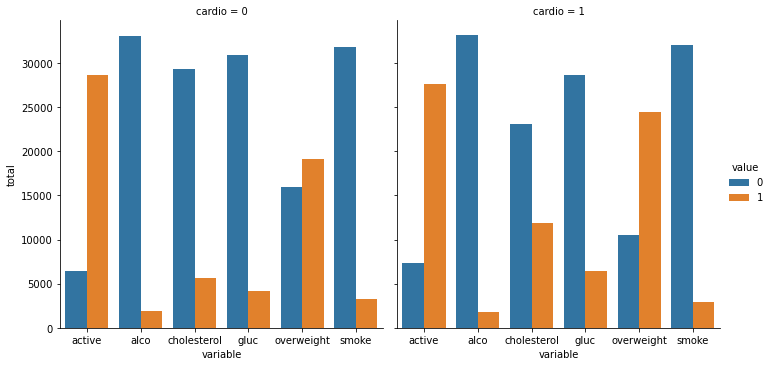

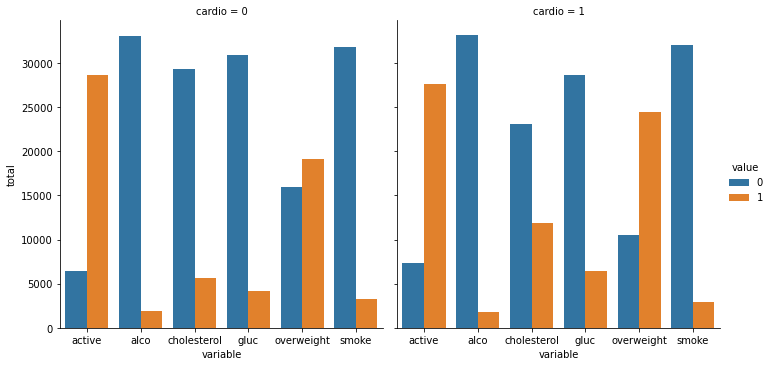

In [17]:
draw = sns.catplot(x = 'variable', 
                   y = 'total', kind = 'bar',
                 data = df_cat, hue='value',
                 col='cardio')
fig = draw.fig


fig

In [12]:
# clean the data:

df_clean = df[(df['ap_lo'] <= df['ap_hi']) &
             (df['height'] >= df['height'].quantile(0.025)) &
              (df['height'] <= df['height'].quantile(0.975)) &
             (df['weight'] >= df['weight'].quantile(0.025)) &
             (df['weight'] <= df['weight'].quantile(0.975))]


corr = df_clean.corr()

corr

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.000000,0.002507,0.003426,0.000326,0.000149,0.003492,0.000484,0.003719,0.002289,-0.002732,-0.000708,0.005891,0.003900,-0.000679
age,0.002507,1.000000,-0.018132,-0.076932,0.070168,0.018689,0.153508,0.129996,0.086990,-0.044371,-0.026970,-0.011445,0.240241,0.089573
gender,0.003426,-0.018132,1.000000,0.505785,0.129979,0.005063,0.059947,-0.037605,-0.021357,0.337436,0.168637,0.007864,0.002320,-0.052930
height,0.000326,-0.076932,0.505785,1.000000,0.251503,0.004586,0.017922,-0.063522,-0.030469,0.187830,0.089785,-0.005661,-0.024102,-0.149570
weight,0.000149,0.070168,0.129979,0.251503,1.000000,0.027030,0.227922,0.135981,0.107072,0.056533,0.059917,-0.014430,0.170042,0.655926
ap_hi,0.003492,0.018689,0.005063,0.004586,0.027030,1.000000,0.072803,0.022807,0.011111,-0.001928,0.000769,-0.000222,0.050556,0.017327
ap_lo,0.000484,0.153508,0.059947,0.017922,0.227922,0.072803,1.000000,0.150362,0.074840,0.023275,0.033042,0.001569,0.327181,0.172212
cholesterol,0.003719,0.129996,-0.037605,-0.063522,0.135981,0.022807,0.150362,1.000000,0.383743,0.012680,0.038446,0.002494,0.203467,0.127986
gluc,0.002289,0.086990,-0.021357,-0.030469,0.107072,0.011111,0.074840,0.383743,1.000000,-0.004157,0.014297,-0.010145,0.088445,0.088109
smoke,-0.002732,-0.044371,0.337436,0.187830,0.056533,-0.001928,0.023275,0.012680,-0.004157,1.000000,0.341200,0.026940,-0.020345,-0.003274


In [18]:
# generating a mask:

mask = np.zeros_like(corr)

mask[np.triu_indices_from(mask)] = True

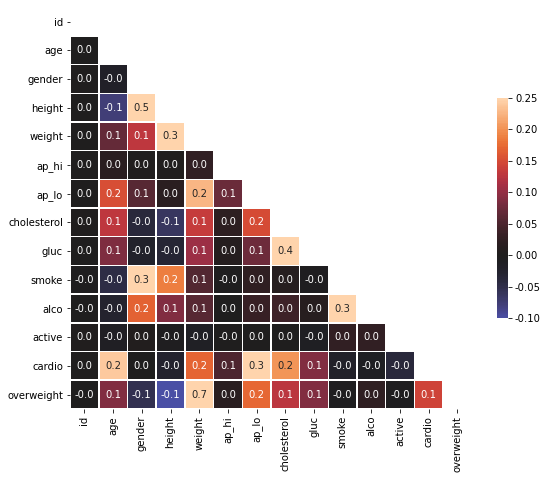

In [19]:
fig, ax = plt.subplots(figsize = (9,9))

ax = sns.heatmap(corr, linewidths=.5, mask=mask,
           vmax=.25, center=0,
            annot=True, fmt = '.1f',
            square = True, vmin=-0.1,
           cbar_kws={'shrink' : .45,
                    'format' : '%.2f'}
)

plt.show(fig)